In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Laboratorio # 1

## Series de tiempo

**1)** Leer el dataset desde el github.

In [2]:
df = pd.read_csv(f'https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv')
df['time'] = pd.to_datetime(df['time'])

**2)** Definir como índice la columna time.

Eliminamos la columna 'Unnamed: 0'

In [3]:
df.set_index('time',inplace=True)
df = df.drop('Unnamed: 0',axis=1)

**3)** Obtenga información del dataframe

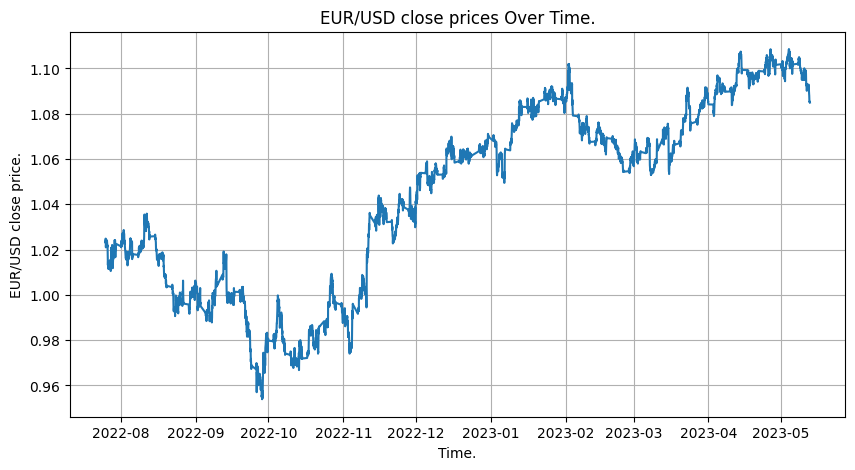

In [4]:
plt.figure(figsize=(10,5))
plt.plot(df.close)
plt.title('EUR/USD close prices Over Time.')
plt.xlabel('Time.')
plt.ylabel('EUR/USD close price.')
plt.grid()
plt.show()

**4)** Determine si hay null, nan en el dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                5000 non-null   float64
 1   high                5000 non-null   float64
 2   low                 5000 non-null   float64
 3   close               5000 non-null   float64
 4   tick_volume         5000 non-null   int64  
 5   spread              5000 non-null   int64  
 6   real_volume         5000 non-null   int64  
 7   MeanCloseOpen       5000 non-null   float64
 8   Diff_Close          5000 non-null   float64
 9   Diff_Open           5000 non-null   float64
 10  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 468.8 KB


**5)** Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.

In [6]:
def Pascal(string):
    import re
    string = string.strip().replace('_',' ')
    string = re.sub(r'(?<!^)(?=[A-Z])', ' ', string)

    return string.title().replace(' ','')

df = df.rename(mapper=Pascal, axis='columns')
df

,Open,High,Low,Close,TickVolume,Spread,RealVolume,MeanCloseOpen,DiffClose,DiffOpen,DiffMeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


**6)** Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:

In [7]:
df2 = df[['Close','DiffClose']]
df2

,Close,DiffClose
time,,
2022-07-25 13:00:00,1.02345,-0.00046
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


<Axes: xlabel='DiffClose', ylabel='Count'>

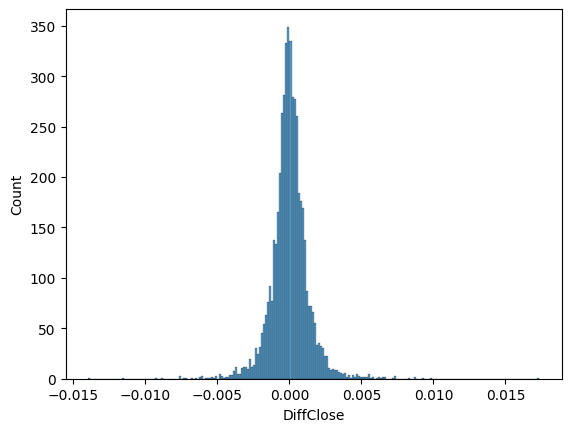

In [8]:
sns.histplot(data=df2,x='DiffClose')

2025-05-17 18:01:42.489 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=106822.330973)
2025-05-17 18:01:42.594 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=106753.471708)
2025-05-17 18:01:42.603 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=927131.217799)
2025-05-17 18:01:42.653 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted t distribution with error=2659.165584)
2025-05-17 18:01:42.692 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=106584.812707)
2025-05-17 18:01:42.819 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=721975.771883)


{'t': {'df': 1.9892711311811406,
  'loc': -3.5663989975384774e-06,
  'scale': 0.0007267442791813495}}

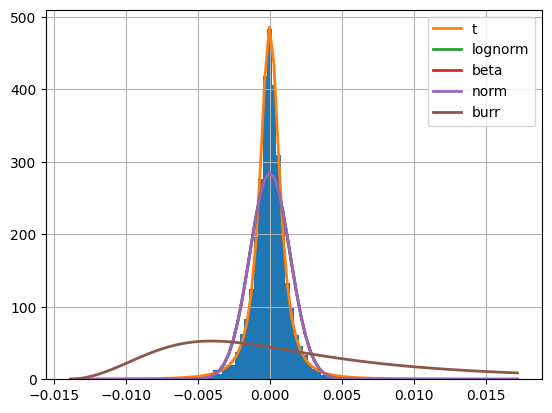

In [9]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df2['DiffClose'],
           distributions=['gamma',
                          'lognorm',
                          'beta',
                          'burr',
                          'norm',
                          't'])
f.fit()
f.summary()
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta
#f.fitted_param["beta"]

In [10]:
f.get_best(method = 'sumsquare_error')

{'t': {'df': 1.9892711311811406,
  'loc': -3.5663989975384774e-06,
  'scale': 0.0007267442791813495}}

2025-05-17 18:01:43.214 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=901459.43742)
2025-05-17 18:01:43.278 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted arcsine distribution with error=905543.76535)
2025-05-17 18:01:43.299 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted bradford distribution with error=802667.843809)
2025-05-17 18:01:43.315 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=106753.471708)
2025-05-17 18:01:43.337 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted alpha distribution with error=120357.494046)
2025-05-17 18:01:43.366 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=23157.930567)
2025-05-17 18:01:43.421 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cosine distribution with error=901459.43742)
2025-05-17 18:01:43.577 | INFO     | fitter.fitter:_fit_sin

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
johnsonsu,1672.213285,10.056937,36.125710,inf,0.011040,0.572048
genhyperbolic,1834.421082,21.299461,53.885427,inf,0.011742,0.492105
norminvgauss,1949.465668,89.074357,115.143130,inf,0.009894,0.708005
jf_skew_t,2108.737544,-54.316820,-28.248047,inf,0.012701,0.392131
t,2659.165584,-135.705209,-116.153630,inf,0.012515,0.410505


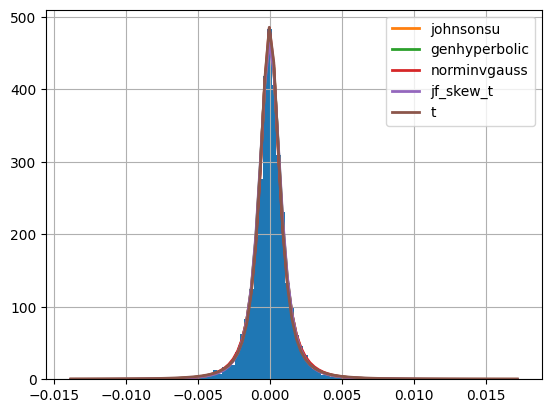

In [11]:
f = Fitter(df2['DiffClose'],distributions=get_distributions())
f.fit()
f.summary()

In [12]:
f.get_best(method = 'sumsquare_error')

{'johnsonsu': {'a': -0.02094202212206005,
  'b': 1.049836731119901,
  'loc': -1.561334570051359e-05,
  'scale': 0.0008807761475225012}}

**7)** Seleccionamos los datos del 2023 del dataset.

Dado que no hay fechas posteriores al 2023, aplicamos un filtro sencillo sobre el índice con ayuda del paquete datetime.

In [13]:
from datetime import datetime

t_Inicio = datetime.strptime(str(20221231000000),'%Y%m%d%H%M%S')

In [14]:
df2 = df2[df2.index >= t_Inicio ]
df2

,Close,DiffClose
time,,
2023-01-02 00:00:00,1.06796,-0.00200
2023-01-02 01:00:00,1.06965,0.00169
2023-01-02 02:00:00,1.07058,0.00093
2023-01-02 03:00:00,1.06896,-0.00162
2023-01-02 04:00:00,1.06880,-0.00016
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


**8)** El comando groupby permite agrupar los datos con la periodicidad deseada: $1$ dias, $2$ dias, $1$ mes etc. Determina el promedio con una periodicidad de $15$ dias, con periodidicidad de $1$ semana, y una periodicidad de $1$ mes

In [15]:
# promedios en las periodicidades solicitadas.
mean15D = df2.groupby(pd.Grouper(freq='15d')).mean()
mean1W = df2.groupby(pd.Grouper(freq='1W')).mean()
mean1M = df2.groupby(pd.Grouper(freq='1M')).mean()

/var/folders/x5/6dss2r_s03z66shv12gx13dm0000gn/T/ipykernel_48607/1064594800.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mean1M = df2.groupby(pd.Grouper(freq='1M')).mean()


In [16]:
from IPython.display import HTML

HTML(f'''
<table>
<tr>
    <td>
        <h4 style="text-align:center;">Promedio cada 15 días</h4>
        {mean15D.to_html()}
    </td>
    <td>
        <h4 style="text-align:center;">Promedio cada semana</h4>
        {mean1W.to_html()}
    </td>
    <td>
        <h4 style="text-align:center;">Promedio cada mes</h4>
        {mean1M.to_html()}
    </td>
</tr>
</table>
''')

,Close,DiffClose
time,,
2023-01-02,1.069361,0.000047
2023-01-17,1.085565,0.000015
2023-02-01,1.077679,-0.000066
2023-02-16,1.063150,-0.000034
2023-03-03,1.063186,0.000026
2023-03-18,1.080936,0.000074
2023-04-02,1.093090,0.000063
2023-04-17,1.099084,-0.000006
2023-05-02,1.098889,-0.000059


**9)** Para los datos asociados a los meses de 2023, construya un histograma para cada mes. Para ello puede emplear el metodo groupby. Notetese que si no realiza una operación después de aplicar el metodo grouby, se puede iterar sobre dicho objeto.

/var/folders/x5/6dss2r_s03z66shv12gx13dm0000gn/T/ipykernel_48607/4082331409.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df2.groupby(pd.Grouper(freq='1M'))


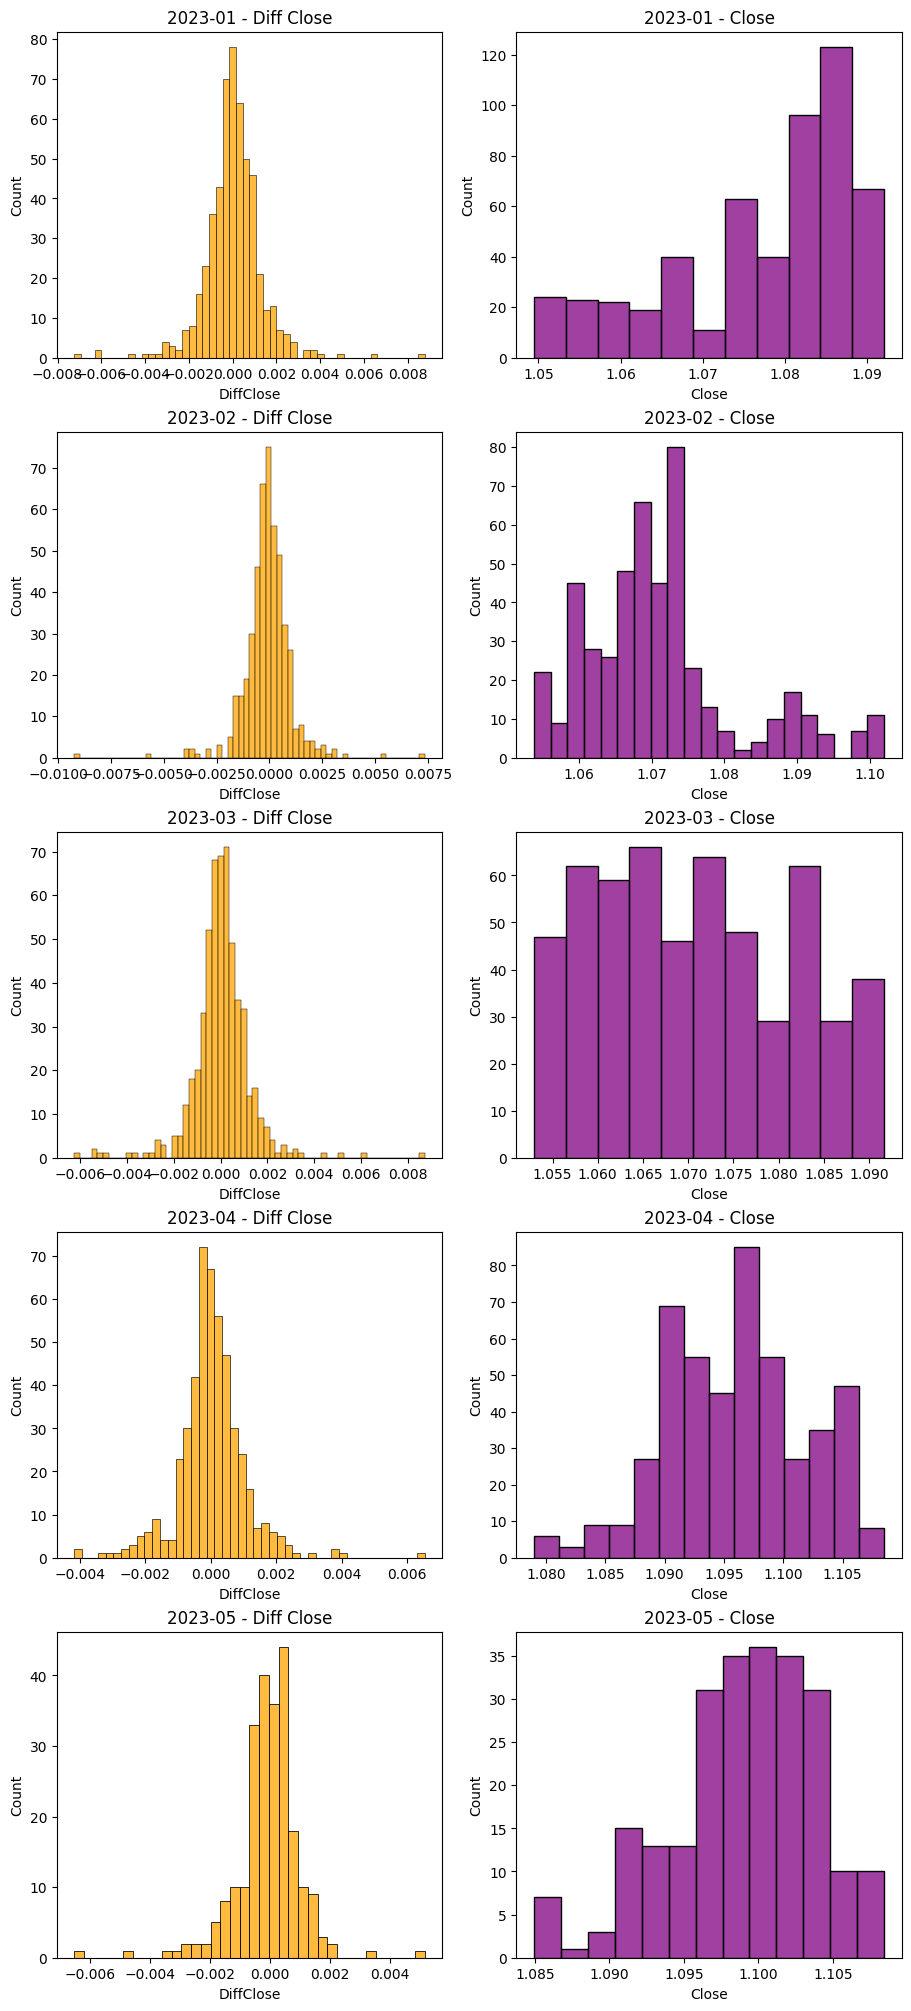

In [17]:
monthly = df2.groupby(pd.Grouper(freq='1M'))

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(9, 20), constrained_layout=True)

for i, (inicio, mes) in enumerate(monthly):
    sns.histplot(data=mes['DiffClose'],color='orange',ax=axes[i,0])
    axes[i,0].set_title(f'{inicio.strftime("%Y-%m")} - Diff Close')
    sns.histplot(data=mes['Close'],color='purple',ax=axes[i,1])
    axes[i,1].set_title(f'{inicio.strftime("%Y-%m")} - Close')

## Análisis de datos con pandas

**1)** Leer los datos desde una página web.

In [18]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Nombres de columnas según la documentación
columns = [
    'ID', 'Diagnosis',
    'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
    'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1',
    'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2',
    'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2',
    'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3',
    'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3'
]

df = pd.read_csv(url,names=columns)
df

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**2)** Renombrar las columnas en formato PascalCase.

In [19]:
def Pascal(string):
    import re
    string = string.strip().replace('_',' ')
    string = re.sub(r'(?<!^)(?=[A-Z])', ' ', string)

    return string.title().replace(' ','')

df = df.rename(mapper=Pascal,axis='columns')
df

,ID,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**3)** Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

In [20]:
df.head()

,ID,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
df.tail()

,ID,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [22]:
df.describe()

,ID,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 569 non-null    int64  
 1   Diagnosis          569 non-null    object 
 2   Radius1            569 non-null    float64
 3   Texture1           569 non-null    float64
 4   Perimeter1         569 non-null    float64
 5   Area1              569 non-null    float64
 6   Smoothness1        569 non-null    float64
 7   Compactness1       569 non-null    float64
 8   Concavity1         569 non-null    float64
 9   ConcavePoints1     569 non-null    float64
 10  Symmetry1          569 non-null    float64
 11  FractalDimension1  569 non-null    float64
 12  Radius2            569 non-null    float64
 13  Texture2           569 non-null    float64
 14  Perimeter2         569 non-null    float64
 15  Area2              569 non-null    float64
 16  Smoothness2        569 non

El método `info()` nos permite notar que ninguna de las columnas tiene datos nulos, y además podemos ver los tipos de datos que contiene cada una de ellas. Por otro lado, `describe()` nos permite dar un vistazo rápido a algunos estadísticos para cada columna, además de los cuartiles principales y un conteo de valores en cada columna. Finalmente, los métodos `head()` y `tail()` nos permiten visualizar el inicio y final del DataFrame.

**4)** Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`. Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos? 

In [24]:
dfNaN = df[df.isnull().any(axis=1)]
dfNaN

,ID,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3


En este caso no tenemos ningún valor `nulo` o `NaN`; una estrategria para reemplazar los valores nulos en un DataFrame es calcular el valor medio para la columna donde se encuentra el valor nulo y reemplazarlo por el valor medio encontrado, de manera que no afecte el valor de los estadísticos que se quieran calcular.

**5)** Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente). Utiliza el método `unique()` para mostrar estos valores.

In [25]:
df.Diagnosis.unique()

array(['M', 'B'], dtype=object)

El nombre de la columna con el rol `target` tiene el nombre `Diagnosis`.

**6)** Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:  
```python
import seaborn as sns
sns.countplot?
```


Cantidad de casos benignos: 357
Cantidad de casos malignos: 212



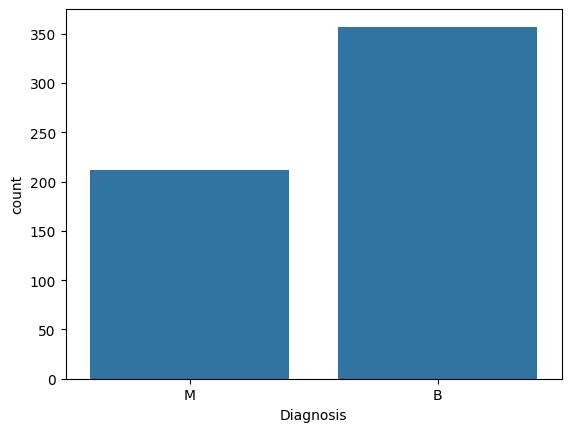

In [26]:

sns.countplot(data=df,x='Diagnosis')
Bs = len(df[df.Diagnosis == 'B'])
Ms = len(df[df.Diagnosis == 'M'])
print(f'''
Cantidad de casos benignos: {Bs}
Cantidad de casos malignos: {Ms}
''')

**7)** Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).

Usamos el método `instert` para ubicar la columna en una posición específica (después de `Dianosis`).

In [27]:
df.insert(2,'DiagnosisNumeric',[1 if i == 'M' else 0 for i in df.Diagnosis])
df

,ID,Diagnosis,DiagnosisNumeric,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**8)** Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula: `(x - mean(x)) / std(x)`

Es posible normalizar las columnas de varias maneras; la más directa se realiza haciendo un subconjunto de los datos que se usa para rellenar de manera mas legible la parte de la tabla copia o la tabla original en sí.

In [28]:
dfNorm = df.copy()
set = df.iloc[:,3:]
dfNorm.iloc[:,3:] = (set - set.mean())/set.std()
dfNorm

,ID,Diagnosis,DiagnosisNumeric,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,842302,M,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,842517,M,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,84300903,M,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,84348301,M,1,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,84358402,M,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,1,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,926682,M,1,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,926954,M,1,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,927241,M,1,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


El otro método es por medio del uso del paquete `StandardScaler` de `sklearn.preprocessing`. Solo basta con aplicar el método `fit_transform` sobre el subconjunto que se desea normalizar.

In [29]:
from sklearn.preprocessing import StandardScaler as scaler

dfNorm = df.copy()
dfNorm.iloc[:, 3:] = scaler().fit_transform(df.iloc[:, 3:])
dfNorm

,ID,Diagnosis,DiagnosisNumeric,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,842302,M,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,M,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,M,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,M,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,M,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,926682,M,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,926954,M,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,927241,M,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


**9)** Agrupar características similares y calcular su promedio. Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


El DataFrame contiene 10 caracteristicas, cada una medida mediante tres métodos distintos. La idea es entonces construir una nueva tabla tal que sus columnas esten compuestas por el valor medio de las tres medidas para cada caracteristica, en cada fila de la tabla.

In [30]:
import re

'''
Se construye un dict con:
keys: valor común medido (feature).
values: lista de columnas que contienen las medidas del valor común.
'''
groups = {}
for i in df.iloc[:,3:].columns:
    match = re.match(r'^[a-zA-Z]+', i)
    if match:
        feature = match.group()
        groups.setdefault(feature + 'Mean', []).append(i)


# crear tabla con la media por grupos.
dfMean = pd.DataFrame()
for feature, same in groups.items():
    dfMean[feature] = df[same].mean(axis=1) # agregar columnas una a una.

dfMean


,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934
1,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741
2,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714
3,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216
4,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908
...,...,...,...,...,...,...,...,...,...,...
564,16.062000,16.682000,105.257667,1221.566667,0.087433,0.118703,0.235527,0.128347,0.129913,0.043873
565,14.861833,22.987667,97.134333,1030.346667,0.073390,0.106610,0.168333,0.092497,0.150460,0.041399
566,12.012133,21.091667,79.475000,676.883333,0.068118,0.149670,0.160037,0.070130,0.131327,0.046191
567,15.688667,23.448333,110.157333,1057.406667,0.096441,0.402227,0.453757,0.144547,0.223880,0.066782


**10)** Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

In [31]:
# se añade la columna `Diagnosis` a la tabla con los valores medios.
dfMean.insert(0,'Diagnosis',df.Diagnosis)

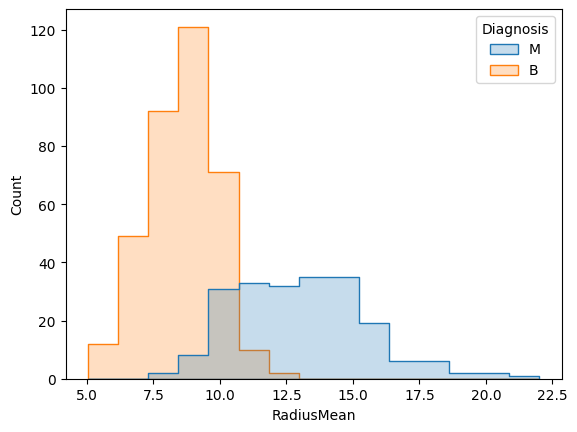

In [32]:
sns.histplot(data=dfMean,x='RadiusMean',hue='Diagnosis',element='step',bins=15,palette={'B':'#ff7f0e','M':'#1f77b4'})
plt.show()

**11)** Generar gráficos de violín para múltiples características. Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

Para que todos los diagramas se muestren de buena menera en el gráfico, normalizamos el DataSet de los valores medios en unidades de desviación estándar.

In [33]:
dfMeanNorm = dfMean.copy()
set = dfMean.iloc[:,1:]
dfMeanNorm.iloc[:,1:] = (set - set.mean())/set.std()
dfMeanNorm.head()

,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,M,1.608815,-1.679618,1.932219,1.682034,1.411893,2.791123,2.219879,2.381444,2.751663,2.071783
1,M,1.801743,-0.408214,1.577798,1.874370,-0.606461,-0.485403,-0.151044,0.886974,-0.248419,-0.051200
2,M,1.554722,0.132238,1.441855,1.505817,0.671925,1.103202,0.967460,2.034272,1.132965,0.062337
3,M,-0.468167,0.177086,-0.376651,-0.626217,3.462686,3.858363,1.953236,1.939126,5.627591,5.021852
4,M,1.505457,-1.375978,1.537760,1.464135,0.369864,-0.099473,0.864392,1.038304,-0.651920,-0.381699


Procedemos a realizar los diagramas de violín para las diferentes características en función del diagnostico.

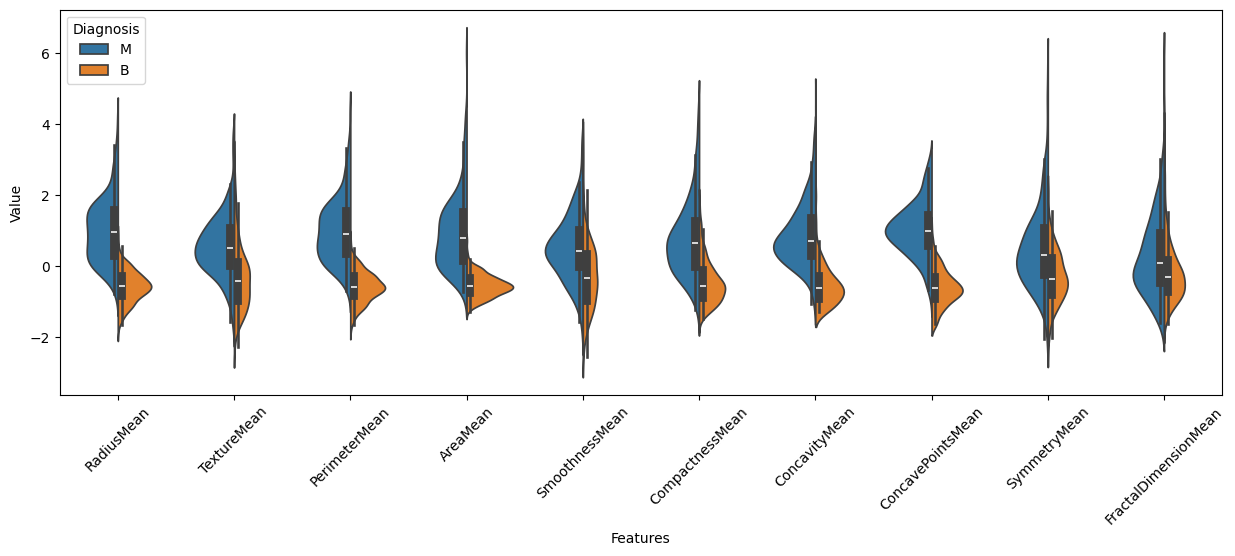

In [34]:
data = dfMeanNorm.melt(id_vars='Diagnosis', value_vars=dfMeanNorm.columns, var_name='Features', value_name='Value')
plt.figure(figsize=(15,5))
sns.violinplot(data=data,x='Features',y='Value',hue='Diagnosis',split=True)
plt.xticks(rotation=45)
plt.show()

**12)** Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python 
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]

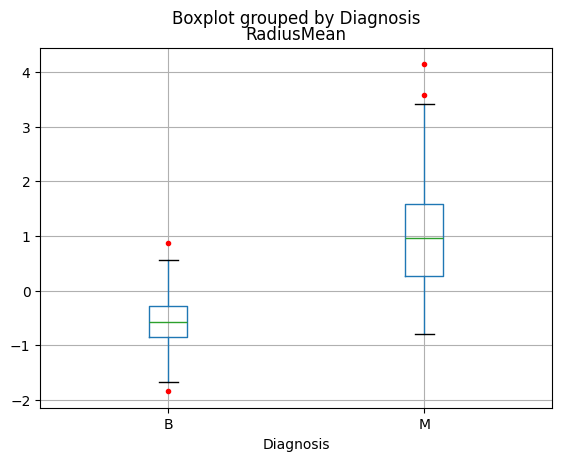

In [35]:
dfMeanNorm.boxplot(column='RadiusMean',by='Diagnosis',sym='r.')
plt.show()

In [37]:
Q1 = dfMean.RadiusMean.quantile(0.25)
Q3 = dfMean.RadiusMean.quantile(0.75)
IQR = Q3 - Q1
dfMean = dfMean[(dfMean.RadiusMean > (Q1 - 1.5*IQR)) & (dfMean.RadiusMean < (Q3 + 1.5*IQR))]
dfMean

,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,M,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934
1,M,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741
2,M,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714
3,M,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216
4,M,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908
...,...,...,...,...,...,...,...,...,...,...,...
563,M,15.390733,18.508667,110.286000,1094.933333,0.085666,0.228433,0.351917,0.142613,0.176123,0.057911
565,M,14.861833,22.987667,97.134333,1030.346667,0.073390,0.106610,0.168333,0.092497,0.150460,0.041399
566,M,12.012133,21.091667,79.475000,676.883333,0.068118,0.149670,0.160037,0.070130,0.131327,0.046191
567,M,15.688667,23.448333,110.157333,1057.406667,0.096441,0.402227,0.453757,0.144547,0.223880,0.066782


**13)** Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

<Axes: >

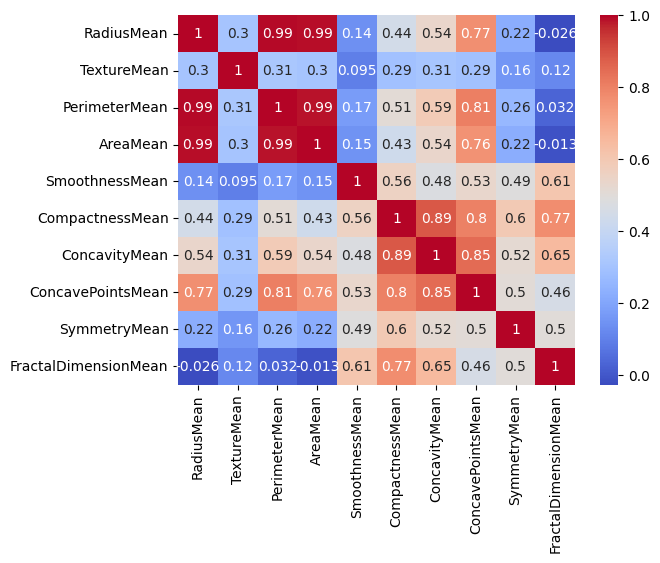

In [50]:
corrMatrix = dfMean.iloc[:,1:].corr()
sns.heatmap(corrMatrix,annot=True,cmap='coolwarm')

**14)** ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

Existen muchos tipos de gráficos que se pueden realizar sobre un conjunto de datos para comprender mejor la información que contienen, cada uno permite visualizar los datos desde puntos de vista específicos que según el problema pueden ser más o menos descriptivos. Los gráficos más comunes son:

* Diagrama tipo pastel: Para visualizar proporciones.
* Gráfico de barras: Permite hacer una comparación entre categorías.
* Gráfico de dispersión (scatter plot): Para visualizar posibles correlaciones, outliers y agrupaciones.
* Gráfico de líneas: Permite visualizar la evolución de una cantidad respecto a otra.
* Diagrama de caja (Boxplot): Para dar un vistazo a la distribución, mediana, cuartiles y outliers.
* Mapa de calor (Heatmap): Para indentificar la forma en la que se relacionan las diferentes componentes del conjunto de datos.
* Diagrama de pares (Pairplot): Permite visualizar posibles correlaciones agrupadas en terminos de una característica específica.
* Gráfico de pastel (Pie chart): Propociones de una variable categórica.
* Gráfico de radar (Radar chart): Permite comparar perfiles en base a un conjunto de características. 

### *Juan José Pérez Avendaño*